Let's start by importing basic packages

In [2]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from tqdm import trange, tqdm
import pickle

from hackathon.utils.utils import *

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

%load_ext autoreload
%autoreload 2

# Power

The "power" file contains energy power consumption of 33 thermal powerlines, each called NPWD2XXX where XXX is a coding of the powerline. This dataset is quite big, so let's read just first few rows of the data to get a glimpse of how it looks like:

In [3]:
power = pd.read_csv('../data/hackathon/power--2014-01-01_2015-01-01.csv', index_col=0, nrows=20)
power

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1388534410697,0.001457,0.001474,0.177440,0.005015,0.000714,0.006247,0.000554,0.001827,0.424989,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.069760,0.000602,0.000598,0.000714,0.006457,0.003227
1388534442708,0.001821,0.001474,0.177440,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.647788,0.000602,0.000499,0.000714,0.007748,0.003227
1388534474708,0.001821,0.001474,0.172173,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000499,0.000714,0.007748,0.003227
1388534506695,0.001821,0.001474,0.177440,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000499,0.000714,0.007748,0.003227
1388534538697,0.001821,0.001474,0.177440,0.005015,0.000857,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.627856,0.000501,0.000499,0.000714,0.007748,0.003227
1388534570695,0.001821,0.001474,0.177440,0.005015,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000598,0.000714,0.006457,0.003873
1388534602699,0.001821,0.001474,0.172173,0.005015,0.000714,0.006247,0.000444,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.004438,0.647788,0.000501,0.000598,0.000714,0.006457,0.003227
1388534634693,0.373872,0.001474,0.172173,0.005015,0.000714,0.001001,0.000554,0.001827,0.002016,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.627856,0.000501,0.000499,0.000714,0.006457,0.003227
1388534666696,0.373872,0.001474,0.177440,0.005015,0.000714,0.000876,0.000554,0.001827,0.002016,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.627856,0.000501,0.000499,0.000714,0.006457,0.003873


The **ut_ms** column stands for "unix timestamp, in miliseconds". In this small sample you can see that the sampling is irregular and quite frequent - this is the case for the whole dataset. In the prediction track we're interested in predicting average thermal power consumption for each powerline **per hour**.

Having this in mind, and also to reduce the size of the dataset, we'll now resample the dataset to hourly intervals averaging all observations within each hour window.

In [9]:
power_df = load_dataframe("../data/hackathon/power--2014-01-01_2015-01-01.csv")
power_df

power_test_df= load_dataframe("../data/hackathon/sample_power_zeros--2015-01-01_2015-07-01.csv")


In [10]:
power_df = pd.concat([power_df, power_test_df])

  Let's have a look at two exemplary powerlines

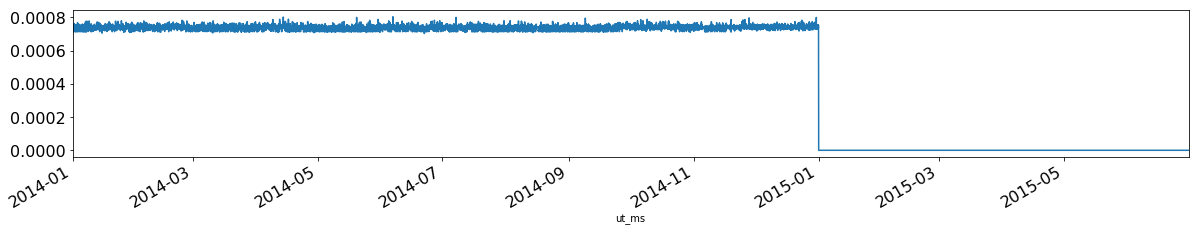

In [11]:
plt.figure(figsize=(20, 3))
power_df['NPWD2471'].plot(fontsize=16)

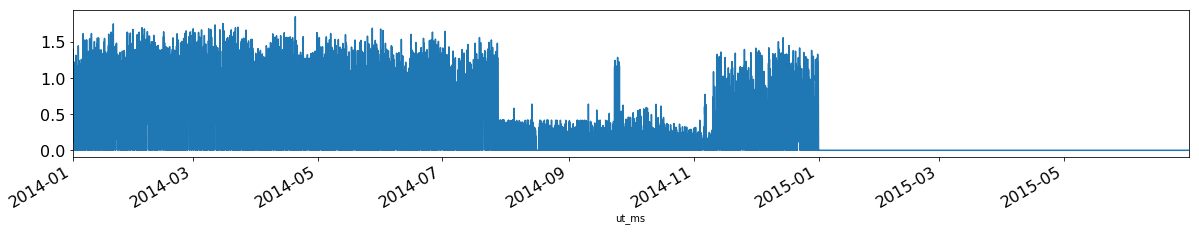

In [12]:
plt.figure(figsize=(20, 3))
power_df['NPWD2551'].plot(fontsize=16)

Note the missing portion of data ("holes" at 2009 and shortly after 2011) in the powerline NPWD2551 above. Hmm, that's strange, isn't it?

Now we'll plot all powerlines at once:

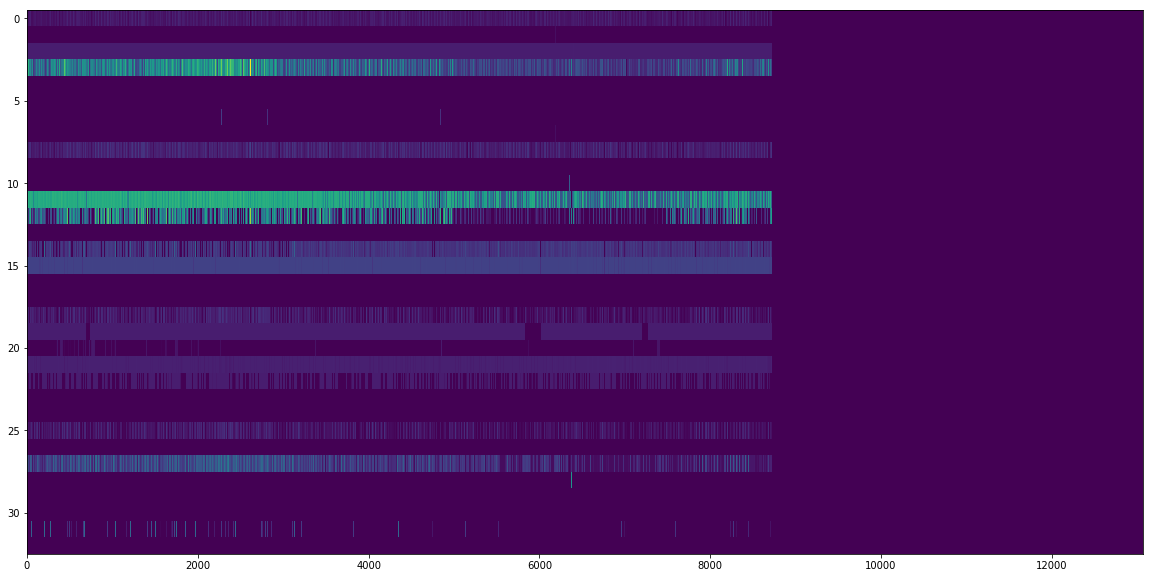

In [13]:
cols = [c for c in power_df.columns if c.startswith("NPWD")]
power_data = power_df[cols].values.T

plt.figure(figsize=(20, 10))
plt.imshow(power_data, aspect='auto', interpolation='nearest')

You can see that the powerlines differ significantly in their behaviour - after all, they're responsible for powering up entirely different equipment. 

Let's print out the exact start and end times of power data acquisition:

In [14]:
start_date, end_date = power_df.index[0], power_df.index[-1]
start_date, end_date

(Timestamp('2014-01-01 00:00:00'), Timestamp('2015-06-30 23:00:00'))

If you're in the modeling track your task is to predict thermal power consumption. The prediction will be done for the last 6 months of 2015 where there're NaN values in all powerlines. Your task is to replace these NaNs with correct measurements of average hourly thermal power consumption

In [16]:
power_df_test = parse_data('../data/hackathon/sample_power_zeros--2015-01-01_2015-07-01.csv')
power_df_test

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
start_date_test, end_date_test = power_df_test.index[0], power_df_test.index[-1]
start_date_test, end_date_test

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-06-30 23:00:00'))

In [98]:
# power_df_all = pd.concat([power_df, power_df_test])

# DMOP - Detailed Mission Operations Plan

The DMOP file is a log describing when the different subsystems' commands have been triggered. Each subsystem command string include the subsystem name along with the command name. Each subsystem command name can be considered as a signature. Due to the amount of different commands, they won't be explained here. These commands have different effects on temperatures of the different subsystems of the spacecraft thus impacting in different ways the thermal subsystem's reactions. In these commands you may find the ON/OFF of radio communications, the ON/OFF of the science instruments, etc.

Each entry starting with an "A" is a subsystem+command log. First 3 letters after initial "A" stand for the subsystem code, the rest represent the command issued. For example, an entry in the log "AMMMF10A0" can be decomposed into subsystem code MMM and command F10A0. The same goes for each other entry.

The DMOP contains also counts of certain events, e.g. "MAPO.0000012708", which stands for "occurence number 12708 of event MAPO". These events are also present in other files. They are not extracted from the DMOP file in this simple starting script.

We'll now load first few rows of the DMOP file:

In [99]:
dmop_raw = pd.read_csv('../small_data/merged_data/dmop.csv', index_col=0, nrows=40)
dmop_raw

,subsystem
ut_ms,
1388536106000,AAAAF40C0
1388538814000,AACFE91A
1388538822000,ATTTF321P
1388538877000,AACFM06A
1388538878000,AACFE03A
1388538882000,AACFE05A
1388538927000,APSF60B0
1388539107000,ATTTF030B
1388540077000,AACFM01A


We've prepared a small script for you to handle preprocessing of the DMOP file. It returns number of commands that were issued for each subsystem in the last 24h prior to the current hour.

In [22]:

dmop_24h_df = load_dataframe("../data/hackathon/2014_2015_24h_dmop/dmop_train.csvsimple_dmop_24h.csv")
dmop_24h_df.shape

dmop_24h_test = load_dataframe("../data/hackathon/2014_2015_24h_dmop/dmop_test.csvsimple_dmop_24h.csv")
dmop_24h_df = pd.concat([dmop_24h_df, dmop_24h_test])

In [24]:
dmop_24h_df.shape

(513, 13)

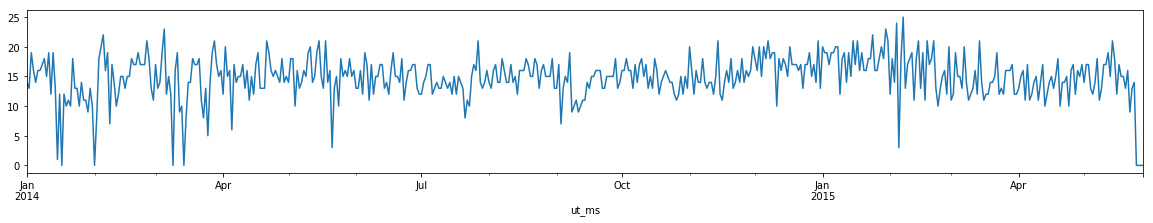

In [25]:
plt.figure(figsize=(20, 3))
dmop_24h_df['dmop_count_24h_AAAA'].plot()

## SAAF - solar aspect angles

Solar aspect angles are expressed with respect to the Sun-MarsExpress line.

    ut_ms: unix timestamp in milliseconds
    sa: solar aspect angle, angle of Mars Express solar panels' normal
    sx: solar angle of the X axis of satellite
    sy: solar angle of the Y axis of satellite
    sz: solar angle of the Z axis of satellite

The angles are a good information about how much power from the solar panels the spacecraft is going to get (sa) and how much each of its faces is roasting to the sun or freezing in its own shadow (sx, sy, sz). 

Let's have a quick peek:

In [103]:
saaf_raw = pd.read_csv('../small_data/merged_data/saaf.csv', index_col=0, nrows=10)
saaf_raw

,sa,sx,sy,sz
ut_ms,,,,
1388534455000,12.25,42.80,90.0,132.80
1388534459000,12.34,42.76,90.0,132.76
1388534515000,11.77,42.31,90.0,132.31
1388534519000,11.86,42.27,90.0,132.27
1388534575000,11.29,41.83,90.0,131.83
1388534579000,11.38,41.79,90.0,131.79
1388534635000,10.80,41.35,90.0,131.35
1388534639000,10.89,41.31,90.0,131.31
1388534695000,10.32,40.86,90.0,130.86


The only preprocessing we apply here is resampling to 1 hour intervals that outputs average of observations within each time window.

In [26]:
saaf_df = load_dataframe("../data/hackathon/context--2014-01-01_2015-01-01--saaf.csv")
saaf_df_test = load_dataframe("../data/hackathon/context--2015-01-01_2015-07-01--saaf.csv")
saaf_df = pd.concat([saaf_df, saaf_df_test])

In [27]:
saaf_df.shape

(12451, 4)

Let's have a look at the solar aspect angle throughout the whole time period:

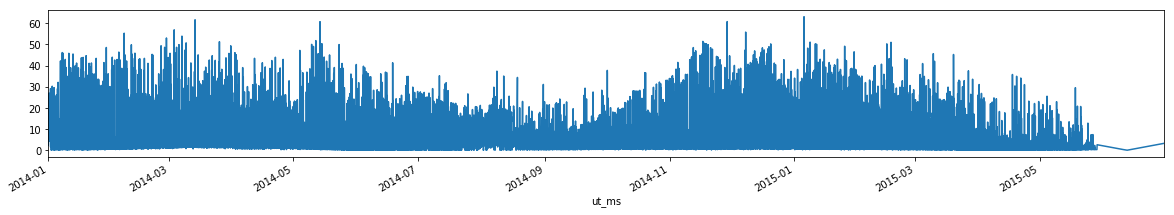

In [28]:
plt.figure(figsize=(20, 3))
saaf_df['sa'].plot()

# LTDATA - long term data

Log of long term data, presented in 24h intervals:

    ut_ms: unix timestamp in milliseconds, this data provides one sample per day
    sunmars_km: the distance in kilometers between the Sun and Mars
    earthmars_km: the distance in kilometers between the Earth and Mars
    sunmarsearthangle_deg: Sun-Mars-Earth angle in degrees
    solarconstantmars: solar constant at Mars in W/m2
    eclipseduration_min: total durations of all eclipses in the day, in minutes
    occultationduration_min: total durations of all occultations in the day, in minutes
    
We use this data as is.

In [29]:
ltdata_df = load_dataframe("../data/hackathon/context--2014-01-01_2015-01-01--ltdata.csv")
ltdata_df_test = load_dataframe("../data/hackathon/context--2015-01-01_2015-07-01--ltdata.csv")

ltdata_df_test = pd.concat([ltdata_df, ltdata_df_test])

In [30]:
ltdata_df[:3]

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
ut_ms,,,,,,
2014-01-01,2.492364e+08,2.041964e+08,36.165104,492.128446,0.0,52.016667
2014-01-02,2.492387e+08,2.027023e+08,36.170689,492.119513,0.0,51.900000
2014-01-03,2.492395e+08,2.012069e+08,36.172424,492.116468,0.0,51.733333


In [32]:
ltdata_df.shape

(365, 6)

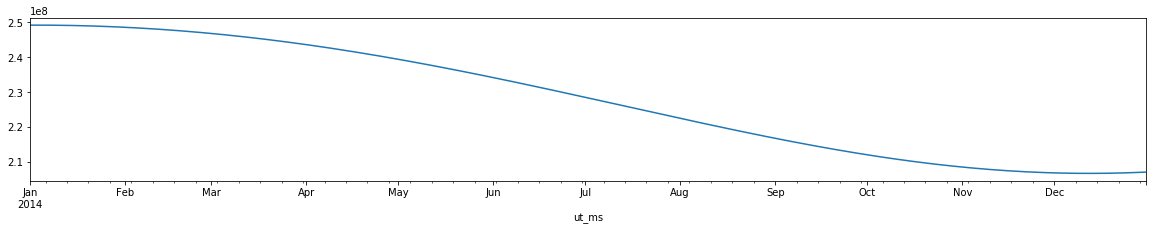

In [33]:
plt.figure(figsize=(20, 3))
ltdata_df['sunmars_km'].plot()

# EVTF - event file

This file contains a lot of events. It covers parts of the flight dynamics timeline present in the FTL and complements information with a lot of other events. 

Most importantly, in this file you can find the following eclipse events: *_PENUMBRA_START, *_PENUMBRA_END, *_UMBRA_START, *_UMBRA_END which indicate the start and end time of different phases of the eclipse (penumbra/umbra).

During the umbra period the Mars Express is cut out from solar energy. During the penumbra the cut out is only partial.

Please consult the wikipedia page about Umbra and Penumbra: https://en.wikipedia.org/wiki/Umbra,_penumbra_and_antumbra

In [111]:
evtf_df_raw = pd.read_csv('../small_data/merged_data/evtf.csv', index_col=0, nrows=10)
evtf_df_raw

,description
ut_ms,
1388534589000,4000_KM_ASCEND
1388537098000,CEB_AOS_03_/_RTLT_01362
1388537772000,MAD_AOS_05_/_RTLT_01362
1388537801000,CEB_AOS_05_/_RTLT_01362
1388538090000,MAD_AOS_06_/_RTLT_01362
1388539371000,MAD_AOS_10_/_RTLT_01362
1388539400000,CEB_AOS_10_/_RTLT_01362
1388539573000,CAN_LOS_10_/_RTLT_01362
1388540751000,CAN_LOS_06_/_RTLT_01362


# FTL - Flight Dynamics TimeLine

Listing of spacecraft pointing events:

    utb_ms: unix timestamp in milliseconds of the time the pointing period begins
    utb_ms: unix timestamp in milliseconds of the time the same pointing period ends
    type: type of pointing or action
    flagcomms: TRUE if any communication device was used, else FALSE.

The events listed here are pointing and action commands that can impact the attitude of the satellite, thus they also may impact the solar aspect angles of the orbiter and/or the switch ON/OFF of some instrumentation.

In [112]:
ftl_df_raw = pd.read_csv('../small_data/merged_data/ftl.csv')
ftl_df_raw

,ut_ms,ute_ms,type,flagcomms
0,1388538877000,1388540077000,SLEW,False
1,1388540077000,1388541547000,EARTH,False
2,1388541547000,1388546947000,MAINTENANCE,False
3,1388546947000,1388552723000,WARMUP,False
4,1388552723000,1388554523000,SLEW,False
5,1388554523000,1388555423000,EARTH,False
6,1388555423000,1388556623000,SLEW,False
7,1388556623000,1388560673000,ACROSS_TRACK,False
8,1388560673000,1388562127000,SLEW,False
9,1388562127000,1388570813000,EARTH,False


In [41]:
ftl_dat = pd.read_csv('../data/hackathon/ftl_dat.csv', index_col=0)
ftl_dat.index = pd.to_datetime(ftl_dat.index)
ftl_dat.index

DatetimeIndex(['2014-01-01 01:00:00', '2014-01-01 03:00:00',
               '2014-01-01 05:00:00', '2014-01-01 06:00:00',
               '2014-01-01 07:00:00', '2014-01-01 10:00:00',
               '2014-01-01 11:00:00', '2014-01-01 12:00:00',
               '2014-01-01 13:00:00', '2014-01-01 14:00:00',
               ...
               '2015-05-26 08:00:00', '2015-05-26 10:00:00',
               '2015-05-26 21:00:00', '2015-05-27 06:00:00',
               '2015-05-27 07:00:00', '2015-05-27 19:00:00',
               '2015-05-27 21:00:00', '2015-05-27 23:00:00',
               '2015-05-29 03:00:00', '2015-07-01 01:00:00'],
              dtype='datetime64[ns]', name=u'ut_ms', length=7365, freq=None)

# Align data to power 

In [43]:
method = 'nearest'
ltdata_df = align_to_power(ltdata_df, power_df, method=method)
saaf_df = align_to_power(saaf_df, power_df, method=method)
dmop_24h_df = align_to_power(dmop_24h_df, power_df, method=method)
ftl_dat_df = align_to_power(ftl_dat, power_df, method=method)

In [47]:
all_data_df = pd.concat([power_df, ltdata_df, saaf_df, dmop_24h_df, ftl_dat_df], axis=1)

In [48]:
all_data_df['usbx'] = np.cos(all_data_df['sx'])*np.sin(all_data_df['sa']) \
                        *np.sin(all_data_df['sz']) + np.sin(all_data_df['sx'])*np.cos(all_data_df['sa'])

all_data_df['usby'] = -np.sin(all_data_df['sx'])*np.sin(all_data_df['sa']) \
                        *np.sin(all_data_df['sz']) + np.cos(all_data_df['sx'])*np.cos(all_data_df['sa'])

all_data_df['usbz'] = np.cos(all_data_df['sz'])*np.sin(all_data_df['sa'])

In [49]:
all_data_df.shape, all_data_df.columns

((13067, 75),
 Index([u'NPWD2372', u'NPWD2401', u'NPWD2402', u'NPWD2451', u'NPWD2471',
        u'NPWD2472', u'NPWD2481', u'NPWD2482', u'NPWD2491', u'NPWD2501',
        u'NPWD2531', u'NPWD2532', u'NPWD2551', u'NPWD2552', u'NPWD2561',
        u'NPWD2562', u'NPWD2691', u'NPWD2692', u'NPWD2721', u'NPWD2722',
        u'NPWD2742', u'NPWD2771', u'NPWD2791', u'NPWD2792', u'NPWD2801',
        u'NPWD2802', u'NPWD2821', u'NPWD2851', u'NPWD2852', u'NPWD2871',
        u'NPWD2872', u'NPWD2881', u'NPWD2882', u'sunmars_km', u'earthmars_km',
        u'sunmarsearthangle_deg', u'solarconstantmars', u'eclipseduration_min',
        u'occultationduration_min', u'sa', u'sx', u'sy', u'sz',
        u'dmop_count_24h_AAAA', u'dmop_count_24h_AACF', u'dmop_count_24h_AHHH',
        u'dmop_count_24h_AMMM', u'dmop_count_24h_AOOO', u'dmop_count_24h_APSF',
        u'dmop_count_24h_ASSS', u'dmop_count_24h_ASXX', u'dmop_count_24h_ATMB',
        u'dmop_count_24h_ATTT', u'dmop_count_24h_AVVV', u'dmop_count_24h_AXXX',
     

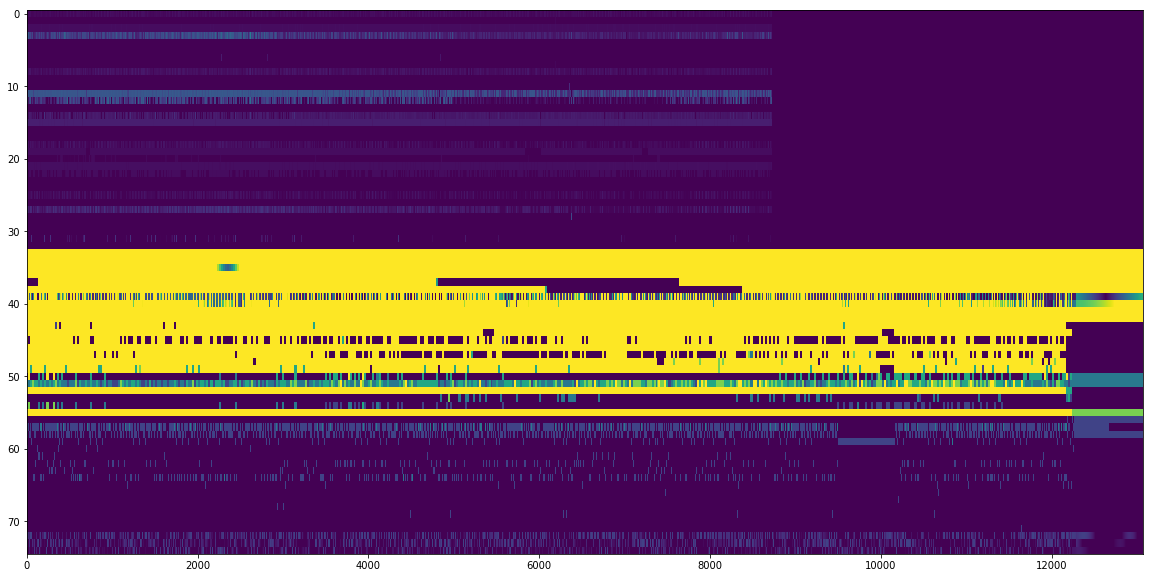

In [50]:
plt.figure(figsize=(20, 10))
plt.imshow(all_data_df.values.T, aspect='auto', vmin=0, vmax=5)

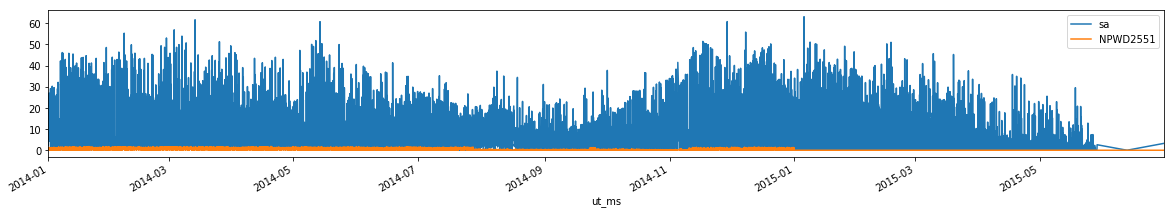

In [51]:
plt.figure(figsize=(20, 3))
ax = plt.subplot(1,1,1)
all_data_df[['sa', 'NPWD2551']].plot(ax=ax)

# Create train/test datasets

In [52]:
train_data = all_data_df[all_data_df.index < start_date_test]
test_data = all_data_df.loc[power_df_test.index]

# returning back to unix time
train_data['ut_ms'] = to_utms(train_data.index)
train_data = train_data.set_index('ut_ms')
test_data['ut_ms'] = to_utms(test_data.index)
test_data = test_data.set_index('ut_ms')

train_data.to_csv("../small_data/train_data.csv")
test_data.to_csv("../small_data/test_data.csv")

/home/kinshiryuu-burp/anaconda3/envs/nitinol/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


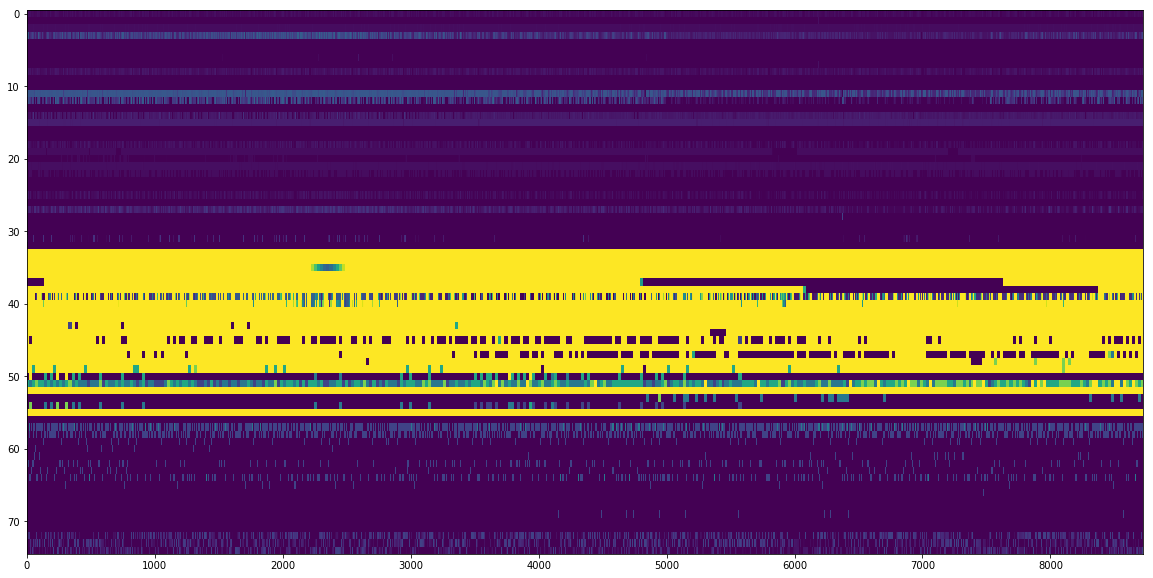

In [53]:
plt.figure(figsize=(20, 10))
plt.imshow(train_data.values.T, aspect='auto', vmin=0, vmax=5)

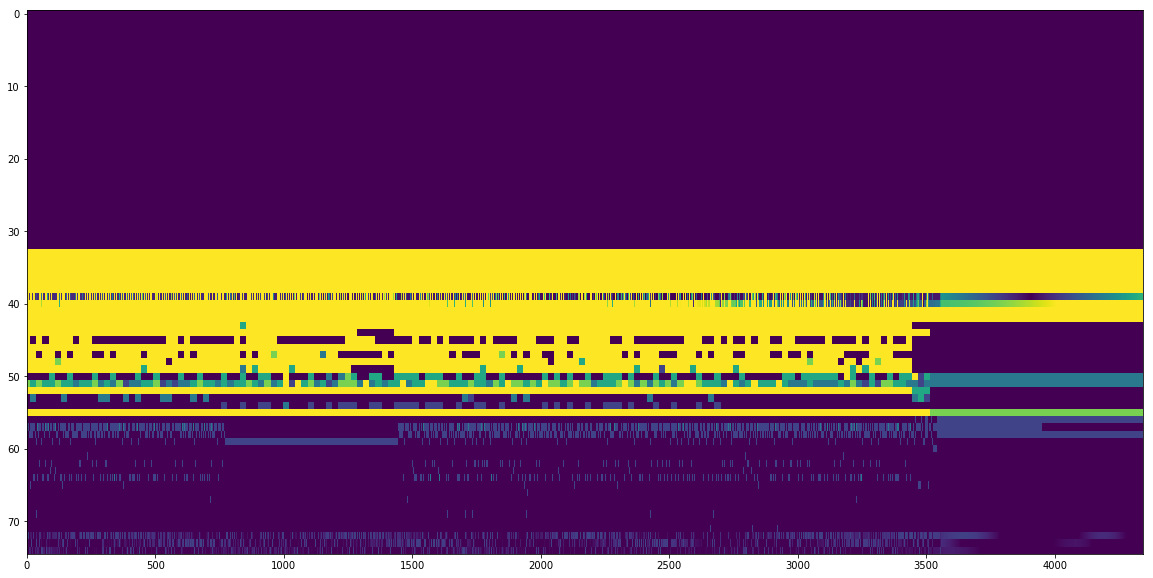

In [54]:
plt.figure(figsize=(20, 10))
plt.imshow(test_data.values.T, aspect='auto', vmin=0, vmax=5)